# Monte Carlo Comparisons 
This is for compairing my code to Monte Carlo.

In [1]:
%pylab ipympl
import pickle
import imshow_slider as ims
from topas2numpy import BinnedResult
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


In [2]:
my_dose_array_corrected = pickle.load(open('dose_doublemu_3.pickle','rb'))
my_dose_array = pickle.load(open('dose_10.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [3]:
conversion = 1.602e-10

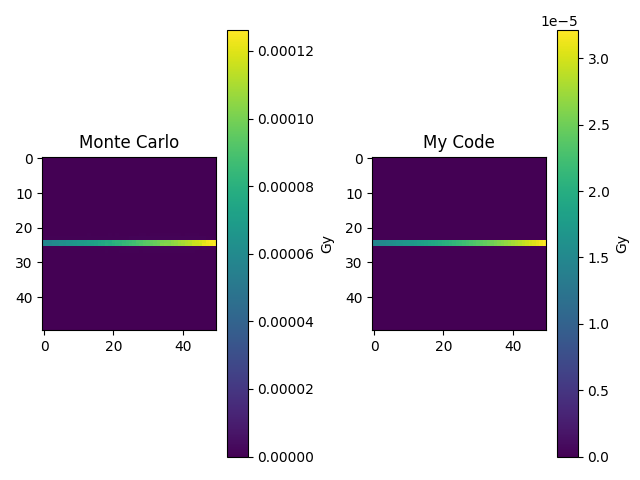

In [4]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


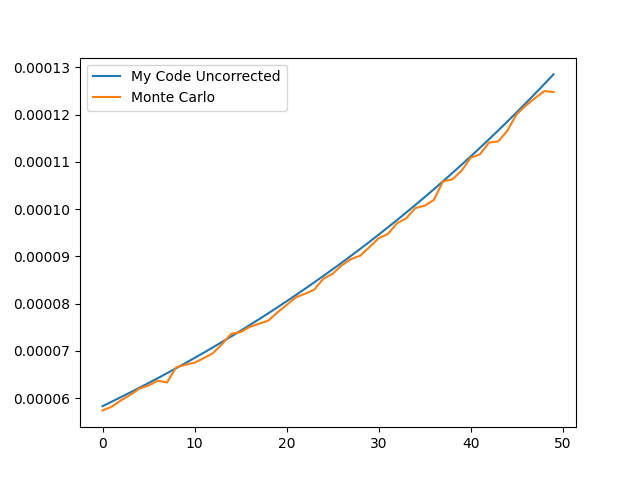

In [8]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion*4,label='My Code Uncorrected')
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()

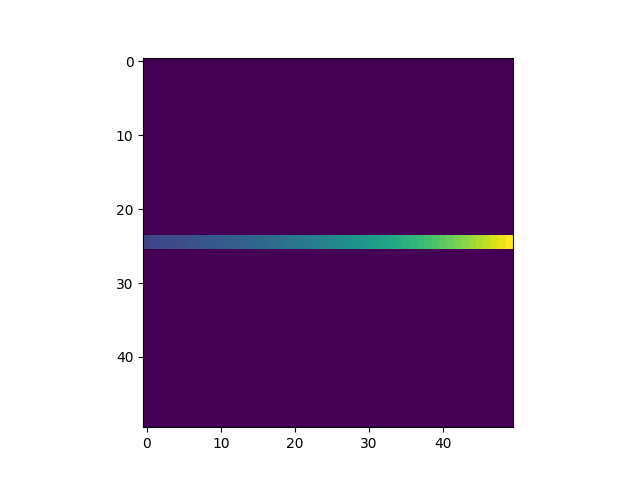

In [9]:
close(6);figure(6)
imshow(my_dose_array[25])

In [9]:
my_fluence_dict = pickle.load(open('terma_test.pickle','rb'))
mc_fluence_array_full = BinnedResult('../Topas/EnergyFluence.csv')
mc_fluence_array = mc_fluence_array_full.data['Sum']

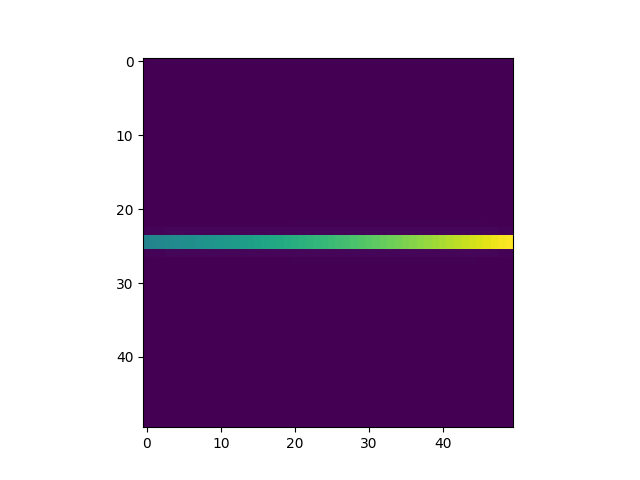

In [10]:
ifig=4;close(ifig);figure(ifig)
imshow(mc_fluence_array[25])

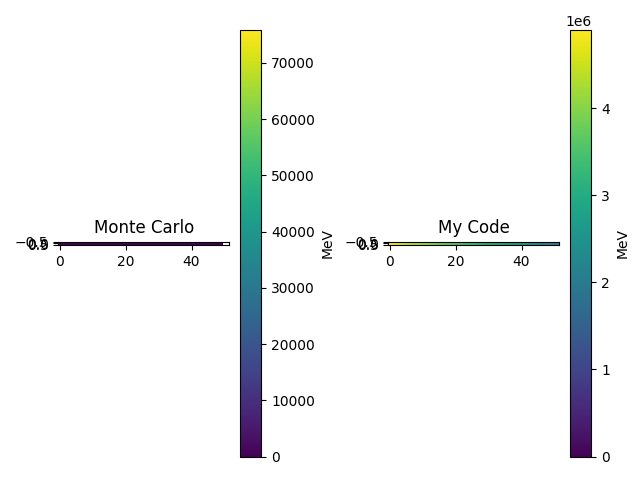

In [10]:
x = 24
bar = True

my_fluence_array = array([my_fluence_dict[n]['TERMA'] for n in range(len(my_fluence_dict))]).reshape((1,52))

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_fluence_array[x],vmin=0,vmax=np.max((mc_fluence_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10/1.1102947211646792)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('MeV')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_fluence_array,vmin=0,vmax=np.max((my_fluence_array)))
# imshow(my_dose_array[x]*1.602e-10/1.1102947211646792,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10/1.1102947211646792)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('MeV')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')

In [48]:
'''
making mu interpolation function
'''
filename = 'energy_absorption_coeffs.txt'

coeff_array = np.loadtxt(filename,skiprows=2,dtype=float)

# exponentially interpolate 
mu_linear = interpolate.interp1d(np.log(coeff_array.T[0]),np.log(coeff_array.T[1]),kind='linear',fill_value='extrapolate')
mu_l = lambda energy, material: np.exp(mu_linear(np.log(energy))) # CHANGE THIS LATER TO A REAL FUNCTION

mu_mass = interpolate.interp1d(np.log(coeff_array.T[0]),np.log(coeff_array.T[2]),kind='linear',fill_value='extrapolate')
mu_m = lambda energy, material: np.exp(mu_mass(np.log(energy))) # CHANGE THIS LATER TO A REAL FUNCTION

In [51]:
my_deposition_array = pickle.load(open('dose_7.pickle','rb'))*pi*0.1**2/mu_m(0.12,'water')
mc_deposition_array_full = BinnedResult('../Topas/EnergyDepositionTest.csv')
mc_deposition_array = mc_fluence_array_full.data['Sum']

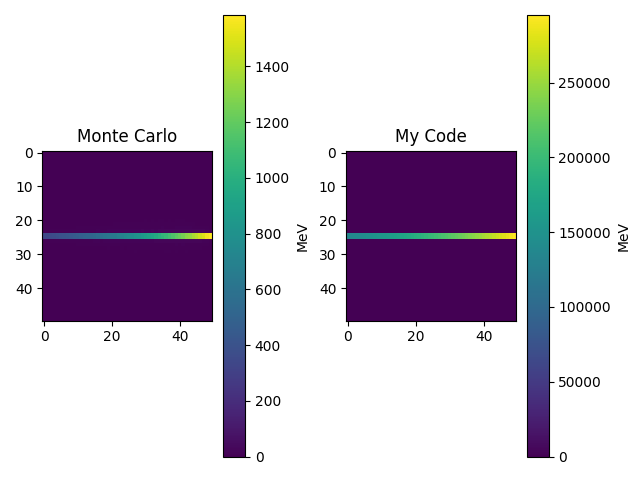

In [53]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_deposition_array[x],vmin=0,vmax=np.max((mc_deposition_array)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('MeV')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_deposition_array[x],vmin=0,vmax=np.max((my_deposition_array)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('MeV')

tight_layout()

In [117]:
mean((my_dose_array.flatten()*1.602e-10/mc_dose_array.flatten())[where(my_dose_array.flatten()*1.602e-10/mc_dose_array.flatten() != 0)[0]])



1.1066308271402419

In [118]:
np.sum(mc_dose_array)

0.005768290834065104

In [119]:
np.sum(my_dose_array)*1.602e-10

0.03482997154775037